In [2]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.phase_plane_analysis import fitzhugh_nagumo

fixed_point: (-1.0000000000000002, -4.440892098500626e-16)


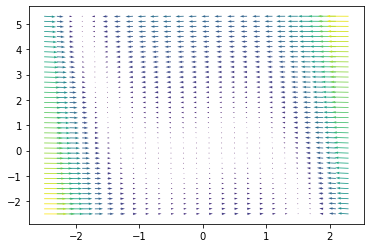

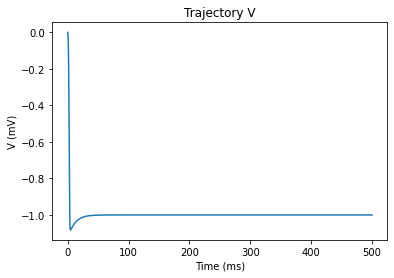

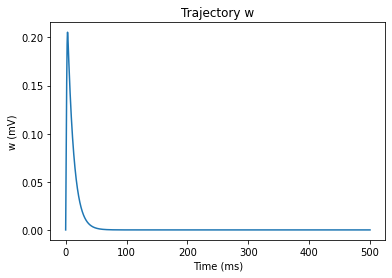

In [46]:
%matplotlib inline
fitzhugh_nagumo.plot_flow()

fixed_point = fitzhugh_nagumo.get_fixed_point()
print("fixed_point: {}".format(fixed_point))

plt.figure()
trajectory = fitzhugh_nagumo.get_trajectory()
plt.plot(trajectory[0], trajectory[1])
plt.title("Trajectory V")
plt.xlabel("Time (ms)")
plt.ylabel("V (mV)")
plt.show()

plt.figure()
trajectory = fitzhugh_nagumo.get_trajectory()
plt.plot(trajectory[0], trajectory[2])
plt.title("Trajectory w")
plt.xlabel("Time (ms)")
plt.ylabel("w (mV)")
plt.show()

In [69]:
help(fitzhugh_nagumo)

Help on module neurodynex3.phase_plane_analysis.fitzhugh_nagumo in neurodynex3.phase_plane_analysis:

NAME
    neurodynex3.phase_plane_analysis.fitzhugh_nagumo

DESCRIPTION
    This file implements functions to simulate and analyze
    Fitzhugh-Nagumo type differential equations with Brian2.
    
    Relevant book chapters:
    
    - http://neuronaldynamics.epfl.ch/online/Ch4.html
    - http://neuronaldynamics.epfl.ch/online/Ch4.S3.html.

FUNCTIONS
    get_fixed_point(I_ext=0.0, eps=0.1, a=2.0)
        Computes the fixed point of the FitzHugh Nagumo model
        as a function of the input current I.
        
        We solve the 3rd order poylnomial equation:
        v**3 + V + a - I0 = 0
        
        Args:
            I: Constant input [mV]
            eps: Inverse time constant of the recovery variable w [1/ms]
            a: Offset of the w-nullcline [mV]
        
        Returns:
            tuple: (v_fp, w_fp) fixed point of the equations
    
    get_trajectory(v0=0.0, w0=0

# 6.1. Exercise: Phase plane analysis

We have implemented the following Fitzhugh-Nagumo model.

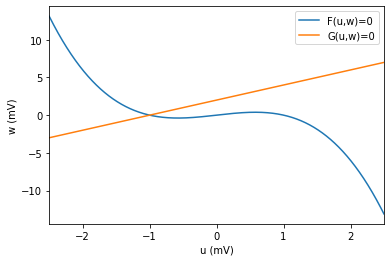

In [49]:
# Plot the two null clines of the system
eps = 0.1 
I_ext = .0
u = np.arange(-2.5, 2.5, 0.001)

F_w = u * (1 - u ** 2) + I_ext
G_w = 2 * (u + 1)

plt.figure("Nullclines")
plt.plot(u, F_w, label = 'F(u,w)=0')
plt.plot(u, G_w, label = 'G(u,w)=0')
plt.legend()
plt.xlim(-2.5, 2.5)
plt.xlabel("u (mV)")
plt.ylabel("w (mV)")
plt.show()

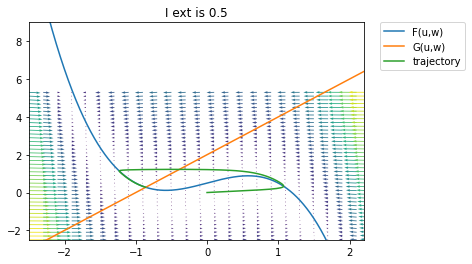

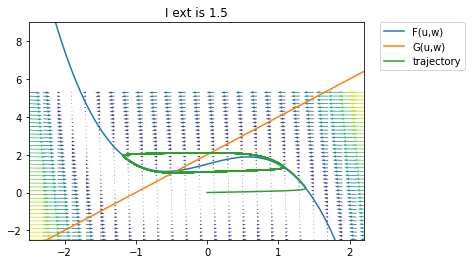

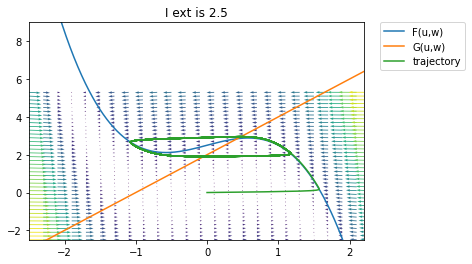

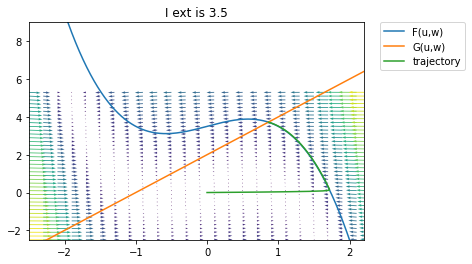

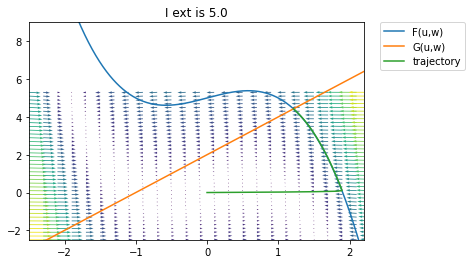

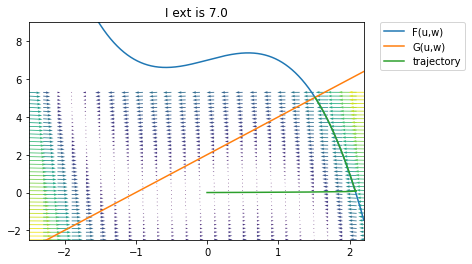

In [70]:
I_ext = 1.3

for I_ext in [0.5, 1.5, 2.5, 3.5, 5., 7.]:
    u = np.arange(-2.5, 2.5, 0.001)
    F_w = u * (1 - u ** 2) + I_ext
    G_w = 2 * (u + 1)

    plt.figure()
    # Plot the flow
    fitzhugh_nagumo.plot_flow()
    # Plot the nullclines
    plt.plot(u, F_w, label = 'F(u,w)')
    plt.plot(u, G_w, label = 'G(u,w)')
    #Plot the trajectory
    t, u_t, w_t = fitzhugh_nagumo.get_trajectory(v0=0.0, w0=0.0, I_ext = I_ext)
    plt.plot(u_t[:4000], w_t[:4000], label = 'trajectory')

    plt.ylim(-2.5, 9)
    plt.xlim(-2.5, 2.2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title("I ext is {}".format(I_ext))
    
    plt.show()

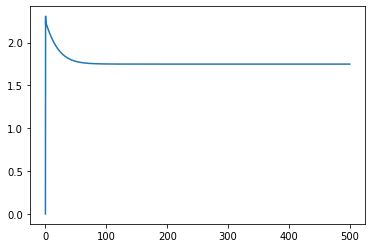

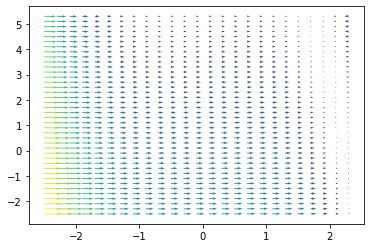

In [44]:
# Fixed point
i_ext = 9.1

plt.figure("Nullclines when I={}".format(i_ext))
trajectory = fitzhugh_nagumo.get_trajectory(v0=0.0, w0=0.0, I_ext=i_ext, eps=0.1)
plt.plot(trajectory[0], trajectory[1])

plt.figure()
fitzhugh_nagumo.plot_flow(I_ext=i_ext, eps=0.1, a=2.0)
plt.show()

# 6.2. Exercise: Jacobian & Eigenvalues

The linear stability of a system of differential equations can be evaluated by calculating the eigenvalues of the system’s Jacobian at the fixed points. In the following we will graphically explore the linear stability of the fixed point of the system Eq. (1). We will find that the linear stability changes as the input current crosses a critical value

In [39]:
def compute_jacobian(u0, w0):
    return [[1-3*u0**2, -1],[.1, -.05]]

Fixed points: -1.0000000000000002 -4.440892098500626e-16
Eigenvalues: -1.9472933372848371 -0.10270666271516411


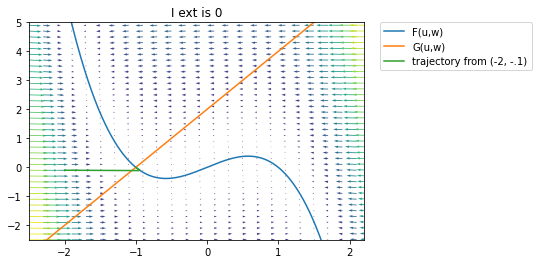

In [93]:
I = 0 
u0, w0 = fitzhugh_nagumo.get_fixed_point(I_ext = I)
print("Fixed points: {} {}".format(u0,w0))
J = compute_jacobian(u0, w0)
# Their real part is negative
eigenvals = np.linalg.eigvals(J)
print("Eigenvalues: {} {}".format(eigenvals[0], eigenvals[1]))

u = np.arange(-2.5, 2.5, 0.001)
F_w = u * (1 - u ** 2) + I
G_w = 2 * (u + 1)

plt.figure()
# Plot the flow
fitzhugh_nagumo.plot_flow()
# Plot the nullclines
plt.plot(u, F_w, label = 'F(u,w)')
plt.plot(u, G_w, label = 'G(u,w)')
#Plot the trajectory -> convergence to the fixed point
t, u_t, w_t = fitzhugh_nagumo.get_trajectory(v0=-2, w0=-0.1, I_ext = I)
plt.plot(u_t[:4900], w_t[:4900], label = 'trajectory from (-2, -.1)')

plt.ylim(-2.5, 5)
plt.xlim(-2.5, 2.2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("I ext is {}".format(I))

plt.show()

Fixed points: 0.0 2.0
Eigenvalues: 0.8940763653560053 0.05592363464399473


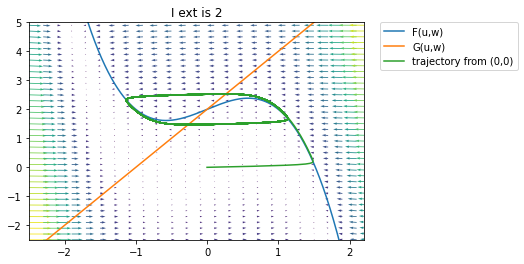

In [123]:
# UNSTABLE FIXED POINT
I = 2
u0, w0 = fitzhugh_nagumo.get_fixed_point(I_ext = I)
print("Fixed points: {} {}".format(u0,w0))
J = compute_jacobian(u0, w0)
# Their real part is negative
eigenvals = np.linalg.eigvals(J)
print("Eigenvalues: {} {}".format(eigenvals[0], eigenvals[1]))

u = np.arange(-2.5, 2.5, 0.001)
F_w = u * (1 - u ** 2) + I
G_w = 2 * (u + 1)

plt.figure()
# Plot the flow
fitzhugh_nagumo.plot_flow()
# Plot the nullclines
plt.plot(u, F_w, label = 'F(u,w)')
plt.plot(u, G_w, label = 'G(u,w)')
#Plot the trajectory -> no trajectory from the fixed point as expected
t, u_t, w_t = fitzhugh_nagumo.get_trajectory(v0=0, w0=0, I_ext = I)
plt.plot(u_t[:4900], w_t[:4900], label = 'trajectory from (0,0)')

plt.ylim(-2.5, 5)
plt.xlim(-2.5, 2.2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("I ext is {}".format(I))

plt.show()

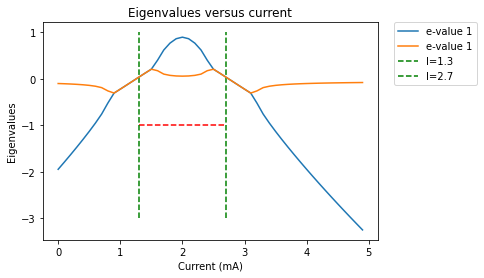

In [122]:
current = np.arange(0,5, 0.1)
eigen_val1 = []
eigen_val2 = []
pos_range = [] 

for i in current:
    u0, w0 = fitzhugh_nagumo.get_fixed_point(I_ext = i)
    J = compute_jacobian(u0, w0)
    e_1_real = np.real(np.linalg.eigvals(J)[0])
    e_2_real = np.real(np.linalg.eigvals(J)[1])
    eigen_val1.append(e_1_real)
    eigen_val2.append(e_2_real)
    if e_1_real>0 and e_2_real>0:
        pos_range.append(i) 
    

fig, axs = plt.subplots()
axs.plot(current, eigen_val1, label = 'e-value 1')
axs.plot(current, eigen_val2, label = 'e-value 1')
axs.hlines(-1, pos_range[0], pos_range[-1], color = 'red', linestyle = '--')
axs.vlines(pos_range[0], -3, 1, label = 'I={}'.format(pos_range[0]), color = 'green', linestyle = '--')
axs.vlines(pos_range[-1], -3, 1, label ='I={}'.format(pos_range[-1]), color = 'green', linestyle = '--')
axs.set_title('Eigenvalues versus current')
axs.set_xlabel('Current (mA)')
axs.set_ylabel('Eigenvalues')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

# Eigenvalues are positive in between I = 1.2 and 2.7
# Instead of a stable fixed point, we have stable limit cycle. 

Current values between 1.2 and 2.7 imply that the fixed point in the system is unstable. Instead, as we see above, the limit cycle becomes stable -- an 